# **Análisis de datos del DataSet: Predict students' dropout and academic success**

### **Introducción del proyecto**
En el ámbito educativo, la identificación temprana de factores que pueden influir en la deserción estudiantil y el éxito académico es fundamental para implementar intervenciones efectivas y mejorar los resultados educativos. Este proyecto se centra en la predicción de la deserción estudiantil y el rendimiento académico utilizando técnicas de aprendizaje automático.

### **Librerías utilizadas**
En este proyecto, se han empleado varias herramientas y bibliotecas de Python para llevar a cabo el análisis y la predicción:

- **NumPy**: Una biblioteca fundamental para realizar operaciones numéricas en Python, utilizada para el manejo eficiente de matrices y operaciones matemáticas.

- **Pandas**: Una biblioteca que proporciona estructuras de datos y herramientas de análisis de datos que facilitan la manipulación y el análisis de conjuntos de datos tabulares.

- **Matplotlib**: Una biblioteca de visualización en 2D de Python que permite crear gráficos estáticos, histogramas, gráficos de barras, dispersión, etc., con solo unas pocas líneas de código.

- **Scikit-learn (sklearn)**: Una biblioteca de aprendizaje automático en Python que ofrece herramientas simples y eficientes para el análisis predictivo de datos. Se utiliza para implementar modelos de aprendizaje automático y realizar evaluaciones de su rendimiento.

Link del DataSet: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## **Fase: Preparación de los datos**

### **Importación de las librerías**

In [437]:
# Importación de librerías necesarias para el análisis de datos - numpy, pandas, matplotlib, sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### **Carga del DataSet**

In [438]:
# Carga del DataSet de estudiantes DataSet_Students.csv
# Cargar el dataset de estudiantes
data = pd.read_csv("DataSet_Students.csv", sep=';')

# Mostrar los primeros registros
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mothers qualification  \
0                           122.0            1                     19   
1                           160.0            1                      1   
2                           122.0            1                     37   
3                           122.0            1                     38   
4                           100.0            1                     37   

   Fathers qualification  ...  Curricular units 2nd sem (credited)  \
0                     12  ...                                    0   
1                      3  ...                                    0   
2                     37  ...                                    0   
3                     37  ...                                    0   
4                     38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [439]:
# Validar la cantidad de registros
N_Registros = data.shape[0]
print("Número de registros: ", N_Registros)

Número de registros:  4424


### **Limpieza de los datos por errores encontrados**
Limpieza de los datos por el error de los estudiantes graduados con notas en 0


In [440]:
# Limpieza de los datos por el error de los estudiantes graduados con notas en 0
data = data.drop(data.loc[(data['Target'] == "Graduate") & ((data['Curricular units 1st sem (grade)'] == 0) | (data['Curricular units 2nd sem (grade)'] == 0))].index)

In [441]:
# Validar la cantidad de registros después de la limpieza
N_Registros = data.shape[0]
print("Número de registros: ", N_Registros)

Número de registros:  4347


### **Conversión de los datos categóricos a numéricos (Target)**

In [442]:
# Conversión de datos categóricos a numéricos
# Filtrar la columna de Target para su modificación a valores numéricos
data["Target"] = data["Target"].map({
    "Dropout":0,
    "Enrolled":1,
    "Graduate":2
})

# Mostrar los primeros registros
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mothers qualification  \
0                           122.0            1                     19   
1                           160.0            1                      1   
2                           122.0            1                     37   
3                           122.0            1                     38   
4                           100.0            1                     37   

   Fathers qualification  ...  Curricular units 2nd sem (credited)  \
0                     12  ...                                    0   
1                      3  ...                                    0   
2                     37  ...                                    0   
3                     37  ...                                    0   
4                     38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       2  
2             1.4  1.74       0  
3            -0.8 -3.12       2  
4            -0.3  0.79       2  

[5 rows x 37 columns]

In [443]:
# Copia del DataSet original para su modificación
new_data = data.copy()
"""new_data = new_data.drop(columns=['Nacionality', 
                                  'Mothers qualification', 
                                  'Fathers qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)"""
new_data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mothers qualification  \
0                           122.0            1                     19   
1                           160.0            1                      1   
2                           122.0            1                     37   
3                           122.0            1                     38   
4                           100.0            1                     37   

   Fathers qualification  ...  Curricular units 2nd sem (credited)  \
0                     12  ...                                    0   
1                      3  ...                                    0   
2                     37  ...                                    0   
3                     37  ...                                    0   
4                     38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       2  
2             1.4  1.74       0  
3            -0.8 -3.12       2  
4            -0.3  0.79       2  

[5 rows x 37 columns]

### **Creación de la matriz de correlación**


In [444]:
# Creación de la matriz de correlación
data_corr_descending = new_data.corr()['Target'].sort_values(ascending=False)
data_corr_descending = pd.DataFrame(data_corr_descending)
print(data_corr_descending)

                                                  Target
Target                                          1.000000
Curricular units 2nd sem (approved)             0.665153
Curricular units 2nd sem (grade)                0.623665
Curricular units 1st sem (approved)             0.570118
Curricular units 1st sem (grade)                0.549227
Tuition fees up to date                         0.410374
Scholarship holder                              0.299314
Curricular units 2nd sem (enrolled)             0.240451
Curricular units 1st sem (enrolled)             0.210002
Curricular units 2nd sem (evaluations)          0.131115
Course                                          0.122588
Admission grade                                 0.108685
Displaced                                       0.104989
Previous qualification (grade)                  0.095101
Application order                               0.091570
Curricular units 1st sem (evaluations)          0.079389
Daytime/evening attendance     

### **Correlación con la variable objetivo (Target)**

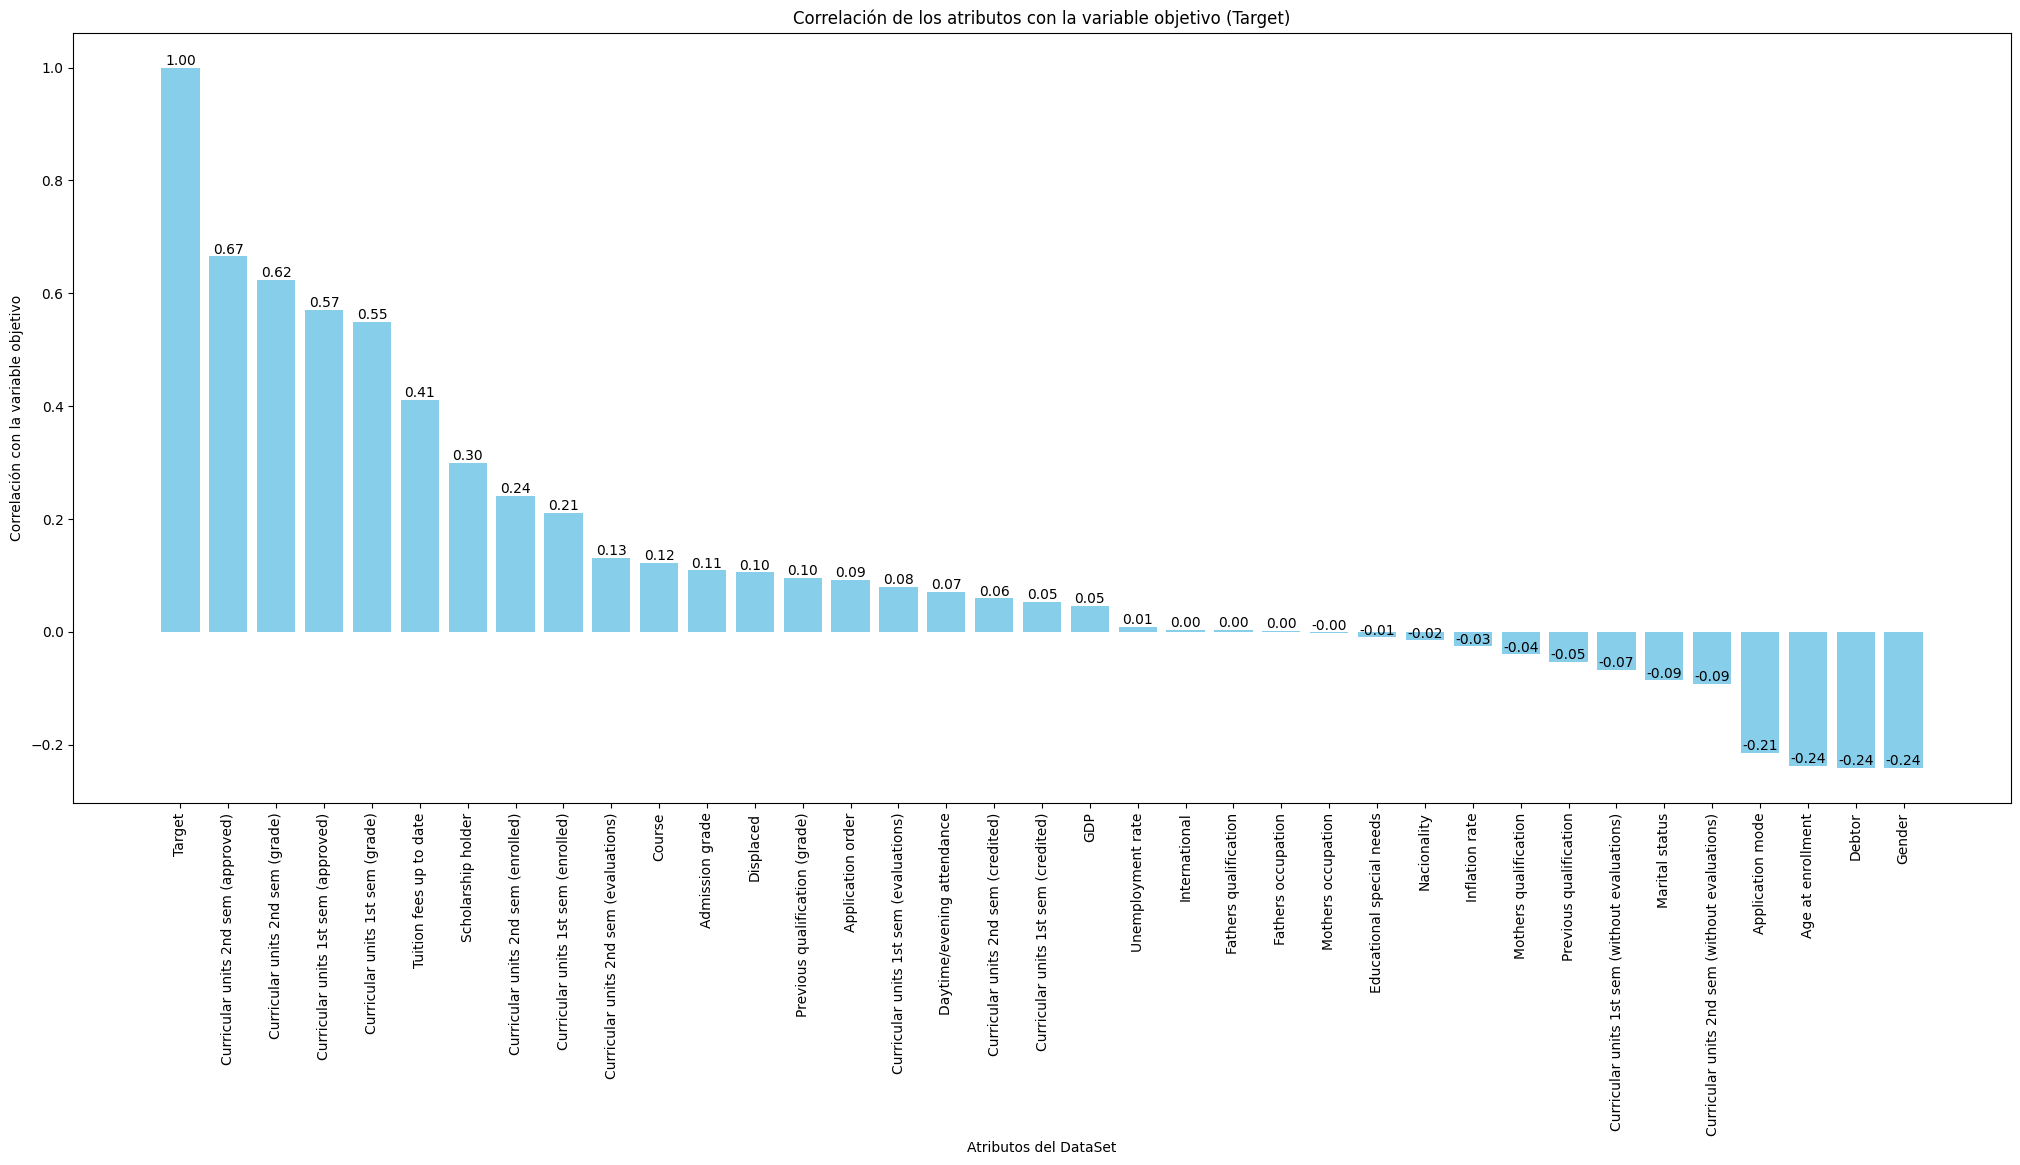

In [445]:
# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Visualización de la matriz de correlación con relación a la variable objetivo (Target)
plt.bar(data_corr_descending.index, data_corr_descending['Target'], width=0.8, color='skyblue')


# Agregar los valores en cada barra
for i, v in enumerate(data_corr_descending['Target']):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Atributos del DataSet')
plt.ylabel('Correlación con la variable objetivo')
plt.title('Correlación de los atributos con la variable objetivo (Target)')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


### **Conteo de Curricular units 2nd sem (approved)**

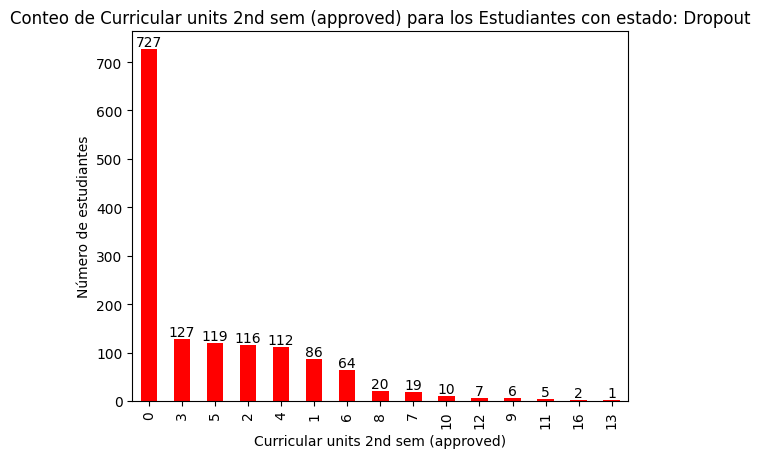

In [446]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna 'Curricular units 2nd sem (approved)'
sorted_data = filtered_data.sort_values(by='Curricular units 2nd sem (approved)', ascending=False)

# Contar los valores de la columna 'Curricular units 2nd sem (approved)'
value_counts = sorted_data['Curricular units 2nd sem (approved)'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Número de estudiantes')
plt.title('Conteo de Curricular units 2nd sem (approved) para los Estudiantes con estado: Dropout')
plt.xticks(rotation=90)
plt.show()

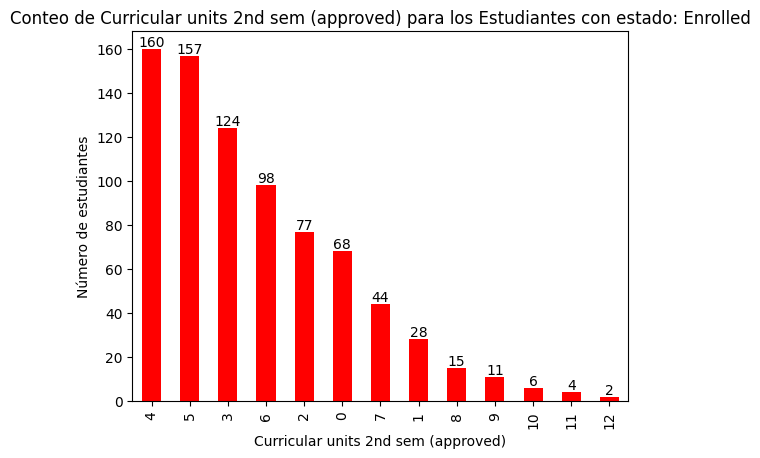

In [447]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna 'Curricular units 2nd sem (approved)'
sorted_data = filtered_data.sort_values(by='Curricular units 2nd sem (approved)', ascending=False)

# Contar los valores de la columna 'Curricular units 2nd sem (approved)'
value_counts = sorted_data['Curricular units 2nd sem (approved)'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Número de estudiantes')
plt.title('Conteo de Curricular units 2nd sem (approved) para los Estudiantes con estado: Enrolled')
plt.xticks(rotation=90)
plt.show()

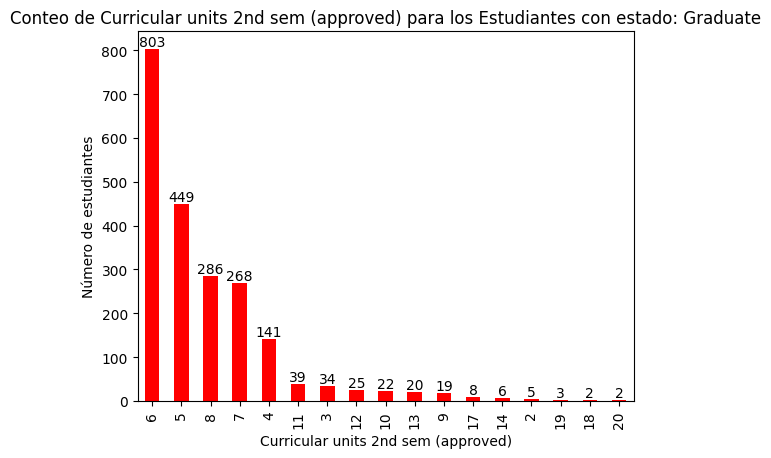

In [448]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna 'Curricular units 2nd sem (approved)'
sorted_data = filtered_data.sort_values(by='Curricular units 2nd sem (approved)', ascending=False)

# Contar los valores de la columna 'Curricular units 2nd sem (approved)'
value_counts = sorted_data['Curricular units 2nd sem (approved)'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Número de estudiantes')
plt.title('Conteo de Curricular units 2nd sem (approved) para los Estudiantes con estado: Graduate')
plt.xticks(rotation=90)
plt.show()

### **Conteo del Género**

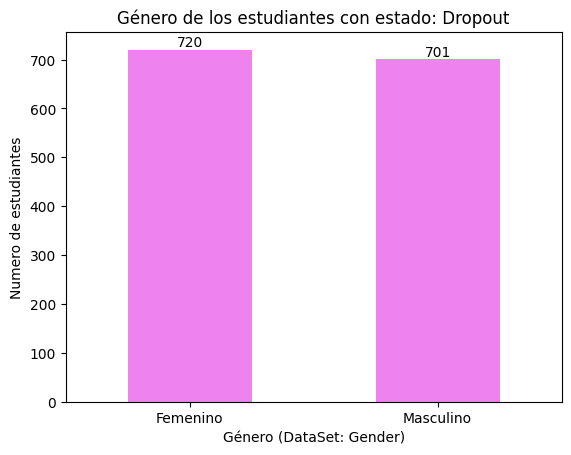

In [449]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna Gender
sorted_data = filtered_data.sort_values(by='Gender', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Gender'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='violet')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Género (DataSet: Gender)')
plt.ylabel('Numero de estudiantes')
plt.title('Género de los estudiantes con estado: Dropout')
plt.xticks([0, 1], ['Femenino', 'Masculino'], rotation=0)
plt.show()

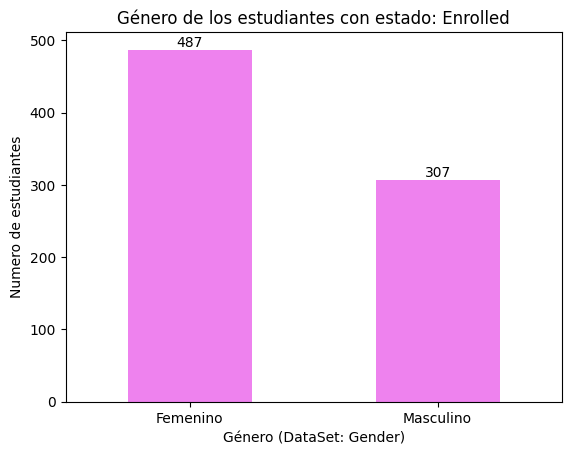

In [450]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna Gender
sorted_data = filtered_data.sort_values(by='Gender', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Gender'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='violet')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Género (DataSet: Gender)')
plt.ylabel('Numero de estudiantes')
plt.title('Género de los estudiantes con estado: Enrolled')
plt.xticks([0, 1], ['Femenino', 'Masculino'], rotation=0)
plt.show()

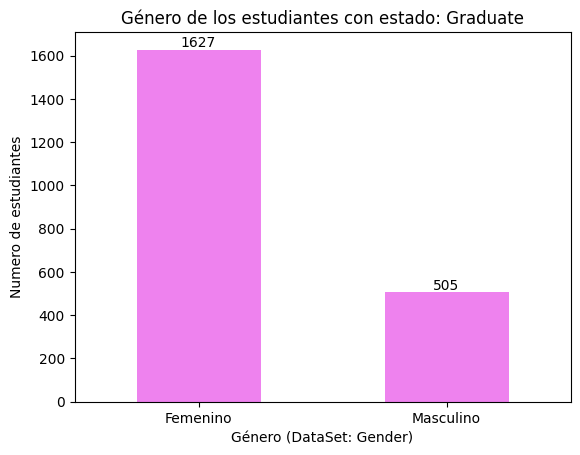

In [451]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna Gender
sorted_data = filtered_data.sort_values(by='Gender', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Gender'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='violet')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Género (DataSet: Gender)')
plt.ylabel('Numero de estudiantes')
plt.title('Género de los estudiantes con estado: Graduate')
plt.xticks([0, 1], ['Femenino', 'Masculino'], rotation=0)
plt.show()

### **Conteo del estado Deudor**

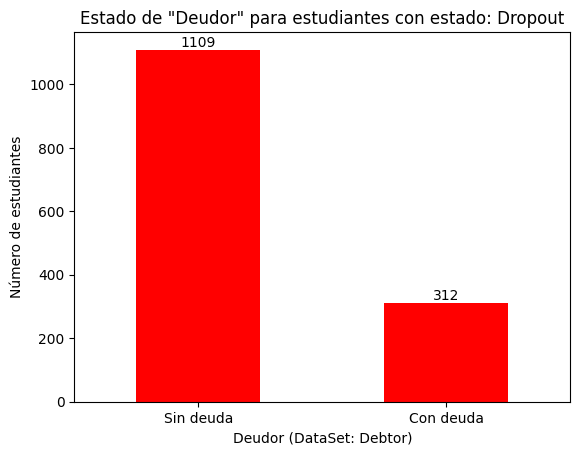

In [452]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna 'Debtor'
sorted_data = filtered_data.sort_values(by='Debtor', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Debtor'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')
# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Deudor (DataSet: Debtor)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Deudor" para estudiantes con estado: Dropout')
plt.xticks([0, 1], ['Sin deuda', 'Con deuda'], rotation=0)
plt.show()

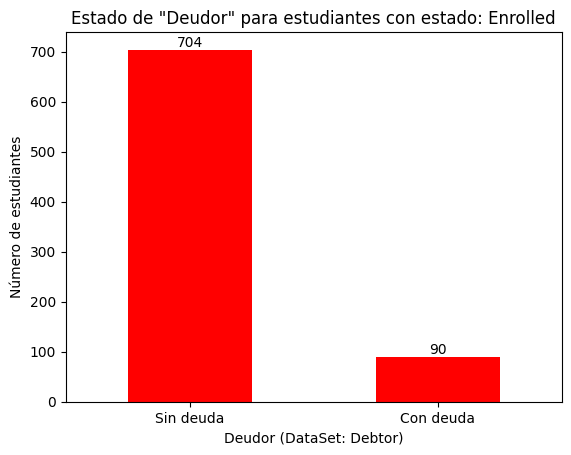

In [453]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna 'Debtor'
sorted_data = filtered_data.sort_values(by='Debtor', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Debtor'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')
# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Deudor (DataSet: Debtor)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Deudor" para estudiantes con estado: Enrolled')
plt.xticks([0, 1], ['Sin deuda', 'Con deuda'], rotation=0)
plt.show()

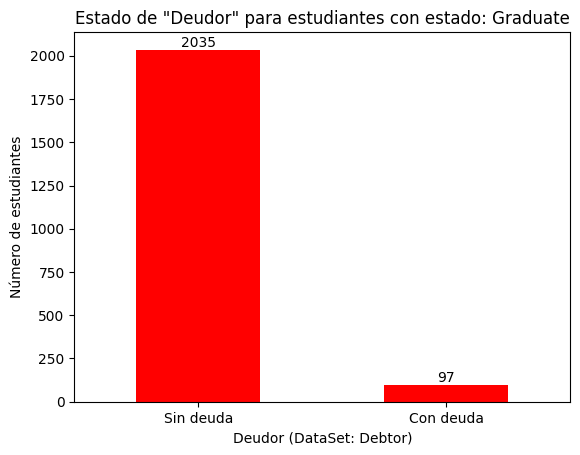

In [454]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna 'Debtor'
sorted_data = filtered_data.sort_values(by='Debtor', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Debtor'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='red')
# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Deudor (DataSet: Debtor)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Deudor" para estudiantes con estado: Graduate')
plt.xticks([0, 1], ['Sin deuda', 'Con deuda'], rotation=0)
plt.show()

### **Conteo del estado de Becario**

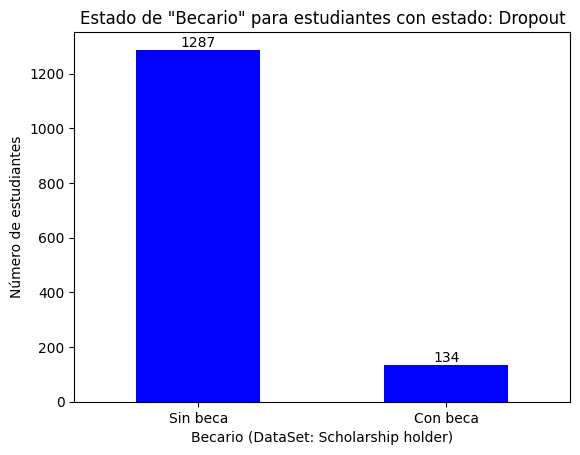

In [455]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna 'Scholarship holder'
sorted_data = filtered_data.sort_values(by='Scholarship holder', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Scholarship holder'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='blue')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Becario (DataSet: Scholarship holder)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Becario" para estudiantes con estado: Dropout')
plt.xticks([0, 1], ['Sin beca', 'Con beca'], rotation=0)
plt.show()

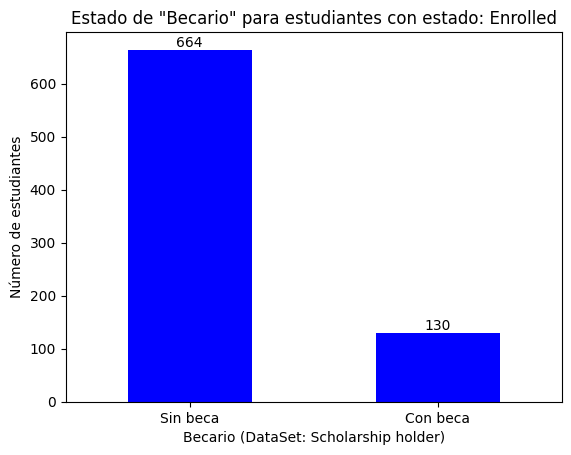

In [456]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna 'Scholarship holder'
sorted_data = filtered_data.sort_values(by='Scholarship holder', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Scholarship holder'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='blue')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Becario (DataSet: Scholarship holder)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Becario" para estudiantes con estado: Enrolled')
plt.xticks([0, 1], ['Sin beca', 'Con beca'], rotation=0)
plt.show()

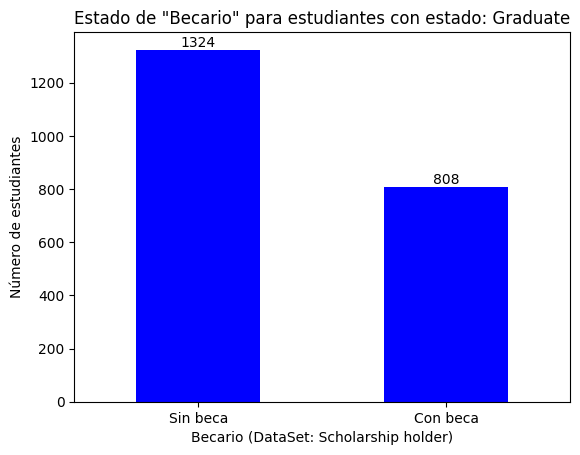

In [457]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna 'Scholarship holder'
sorted_data = filtered_data.sort_values(by='Scholarship holder', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Scholarship holder'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='blue')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Becario (DataSet: Scholarship holder)')
plt.ylabel('Número de estudiantes')
plt.title('Estado de "Becario" para estudiantes con estado: Graduate')
plt.xticks([0, 1], ['Sin beca', 'Con beca'], rotation=0)
plt.show()

### **Conteo del modo de aplicación**

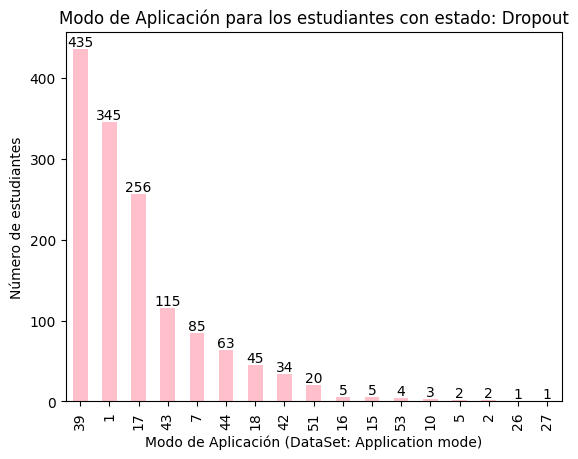

In [458]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna 'Application mode'
sorted_data = filtered_data.sort_values(by='Application mode', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Application mode'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='pink')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Modo de Aplicación (DataSet: Application mode)')
plt.ylabel('Número de estudiantes')
plt.title('Modo de Aplicación para los estudiantes con estado: Dropout')
plt.xticks(rotation=90)
plt.show()

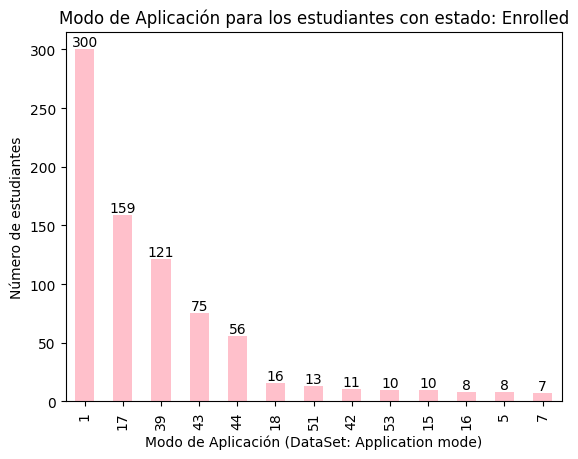

In [459]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna 'Application mode'
sorted_data = filtered_data.sort_values(by='Application mode', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Application mode'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='pink')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Modo de Aplicación (DataSet: Application mode)')
plt.ylabel('Número de estudiantes')
plt.title('Modo de Aplicación para los estudiantes con estado: Enrolled')
plt.xticks(rotation=90)
plt.show()

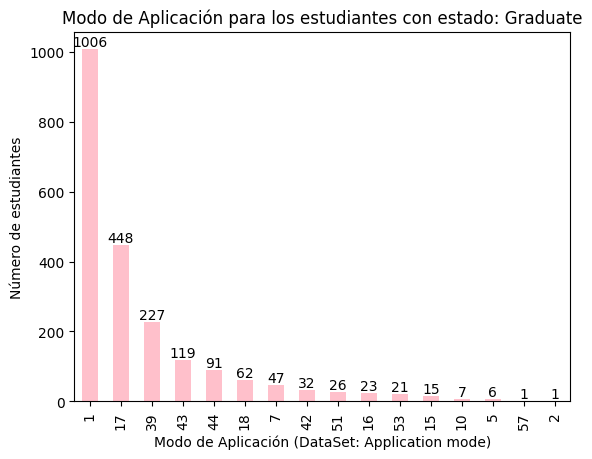

In [460]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna 'Application mode'
sorted_data = filtered_data.sort_values(by='Application mode', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Application mode'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='pink')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Modo de Aplicación (DataSet: Application mode)')
plt.ylabel('Número de estudiantes')
plt.title('Modo de Aplicación para los estudiantes con estado: Graduate')
plt.xticks(rotation=90)
plt.show()

### **Conteo del estado de Matriculación al dia**

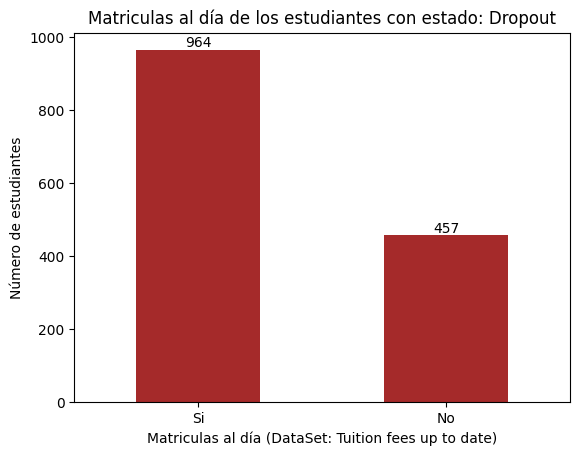

In [461]:
# Filtrar los datos para obtener solo los estudiantes con estado: Dropout
filtered_data = new_data[new_data['Target'] == 0]

# Ordenar los datos por la columna 'Tuition fees up to date'
sorted_data = filtered_data.sort_values(by='Tuition fees up to date', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Tuition fees up to date'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='brown')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Matriculas al día (DataSet: Tuition fees up to date)')
plt.ylabel('Número de estudiantes')
plt.title('Matriculas al día de los estudiantes con estado: Dropout')
plt.xticks([0, 1], ['Si', 'No'])
plt.xticks(rotation=0)

plt.show()

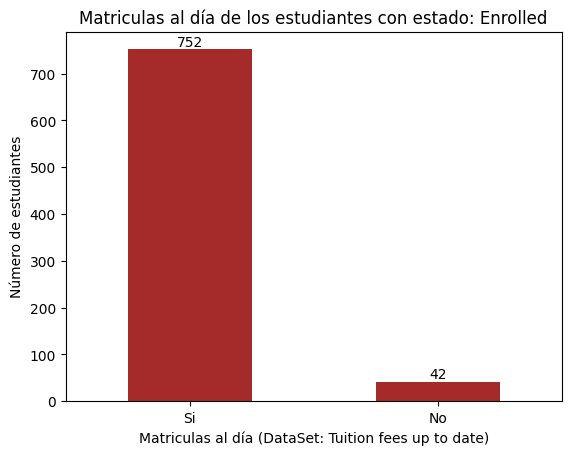

In [462]:
# Filtrar los datos para obtener solo los estudiantes con estado: Enrolled
filtered_data = new_data[new_data['Target'] == 1]

# Ordenar los datos por la columna 'Tuition fees up to date'
sorted_data = filtered_data.sort_values(by='Tuition fees up to date', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Tuition fees up to date'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='brown')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Matriculas al día (DataSet: Tuition fees up to date)')
plt.ylabel('Número de estudiantes')
plt.title('Matriculas al día de los estudiantes con estado: Enrolled')
plt.xticks([0, 1], ['Si', 'No'])
plt.xticks(rotation=0)

plt.show()

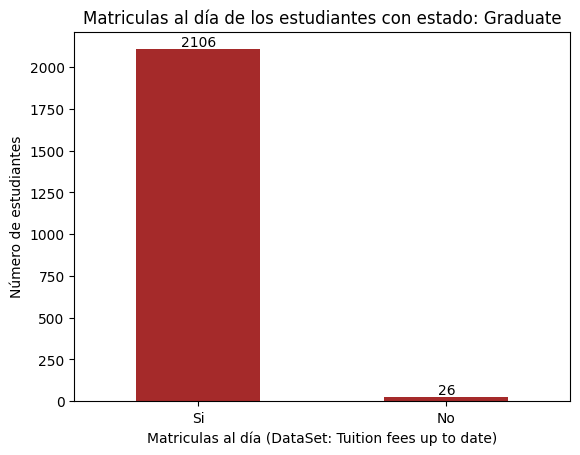

In [463]:
# Filtrar los datos para obtener solo los estudiantes con estado: Graduate
filtered_data = new_data[new_data['Target'] == 2]

# Ordenar los datos por la columna 'Tuition fees up to date'
sorted_data = filtered_data.sort_values(by='Tuition fees up to date', ascending=False)

# Contar los valores de la columna
value_counts = sorted_data['Tuition fees up to date'].value_counts()

# Crear un gráfico de barras
value_counts.plot(kind='bar', color='brown')

# Agregar los valores encima de cada barra
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Agregar etiquetas y título
plt.xlabel('Matriculas al día (DataSet: Tuition fees up to date)')
plt.ylabel('Número de estudiantes')
plt.title('Matriculas al día de los estudiantes con estado: Graduate')
plt.xticks([0, 1], ['Si', 'No'])
plt.xticks(rotation=0)

plt.show()

## **Fase : Modelamiento**
### **Creación de los modelos de predicción**

- ### **Modelo - Random Forest Regressor (Todos los atributos)**


Información del modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.355839


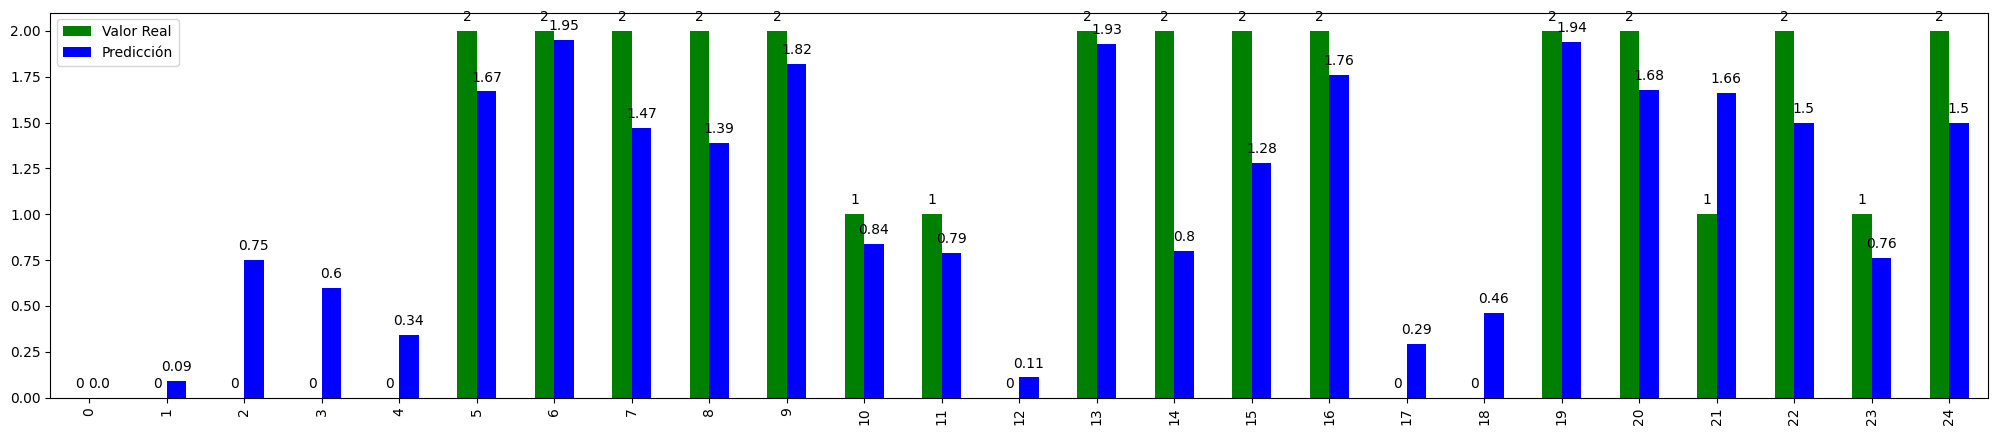

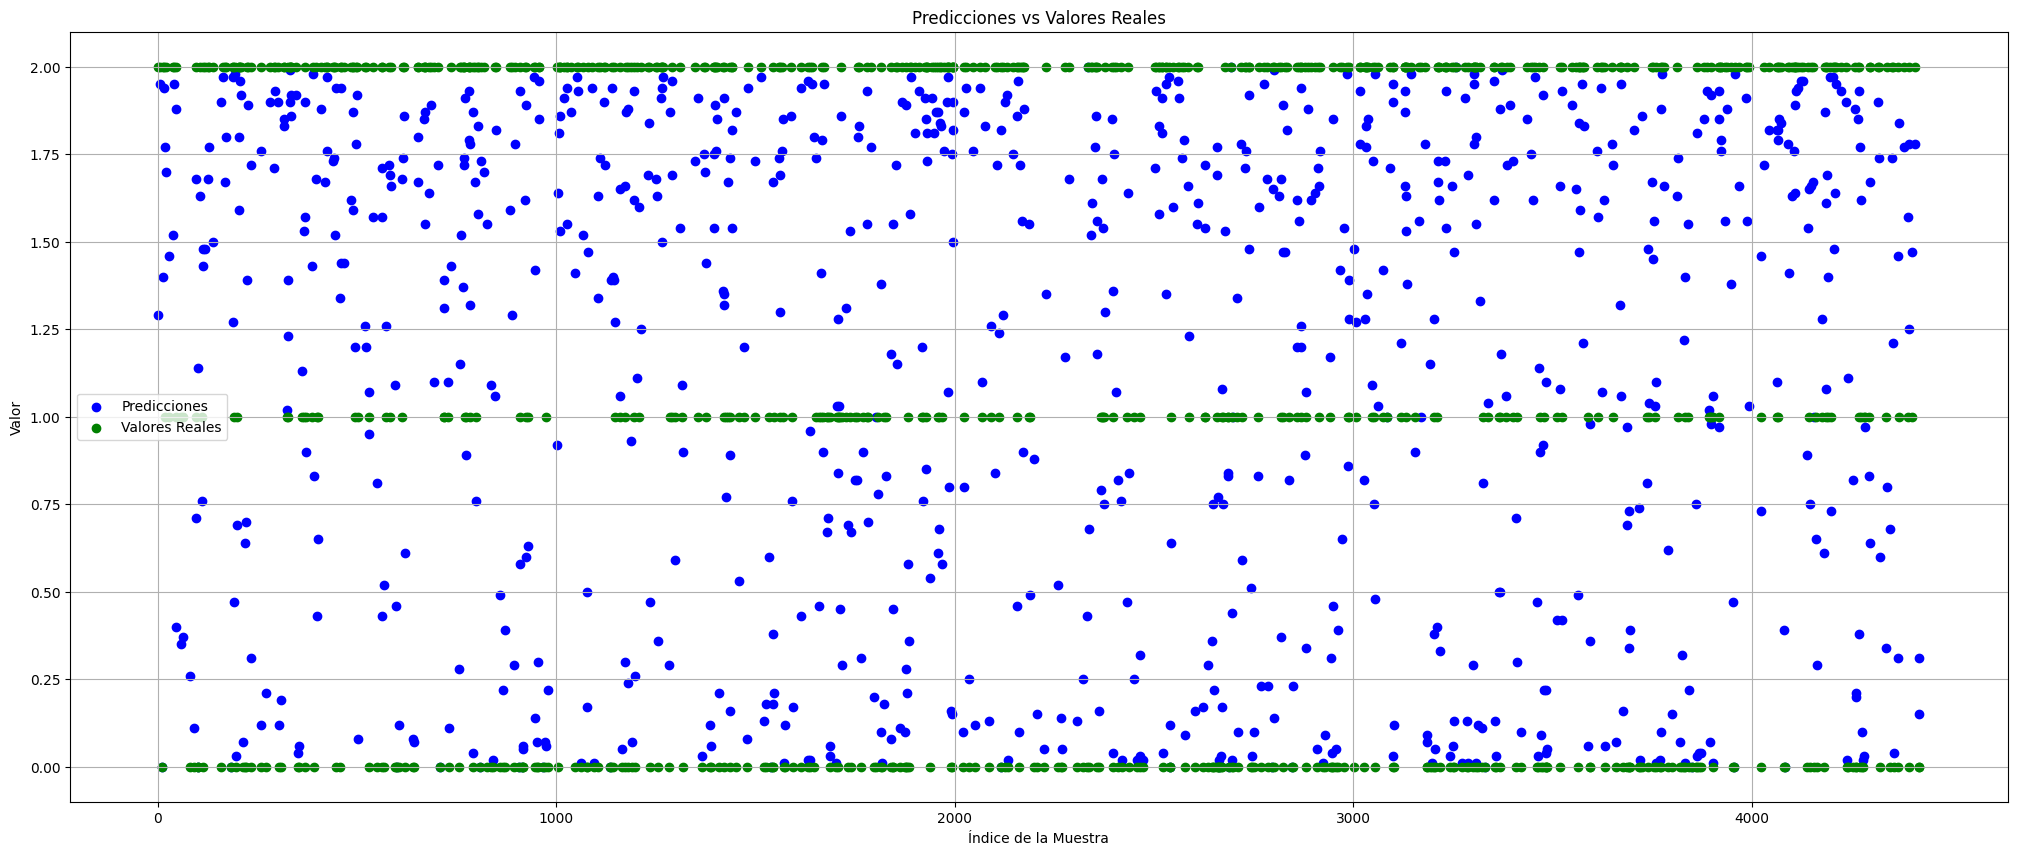

In [464]:
attributes = new_data.drop('Target', axis=1) # Quitamos la columna Target

objetive = new_data.Target # Definimos la columna Target como la variable objetivo

train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1) # Dividimos el dataset en entrenamiento y validación

# Crear un modelo de regresión con Random Forest
rf_model = RandomForestRegressor(random_state=1) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

rf_model.fit(train_X, train_y) # Entrenamos el modelo con los datos de entrenamiento

rf_val_predictions = rf_model.predict(val_X) # Realizamos predicciones con los datos de validación

rf_val_mae = mean_absolute_error(rf_val_predictions, val_y) # Calculamos el error medio absoluto

rf_val_varianza = explained_variance_score(rf_val_predictions, val_y) # Calculamos la varianza

# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": rf_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')


print("")
# Datos
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', rf_val_mae],
    #['Variance Value of original data', rf_val_varianza],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, rf_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


- ### **Modelo - Random Forest Regressor (Solo estos atributos)**
- Marital status
- Application mode
- Application order
- Course
- Previous qualification
- Mothers occupation
- Fathers occupation
- Displaced
- Tuition fees up to date
- Scholarship holder
- Age at enrollment


Información del Modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.593395
Variance Value of original data    -0.824283


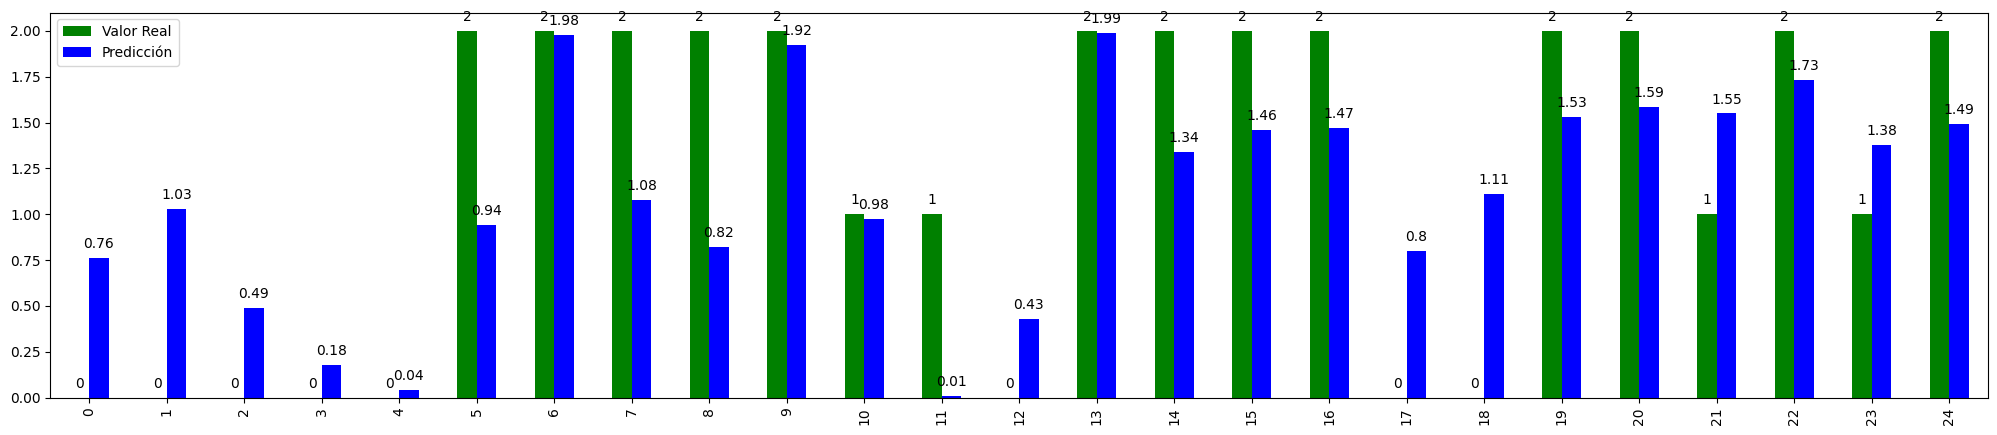

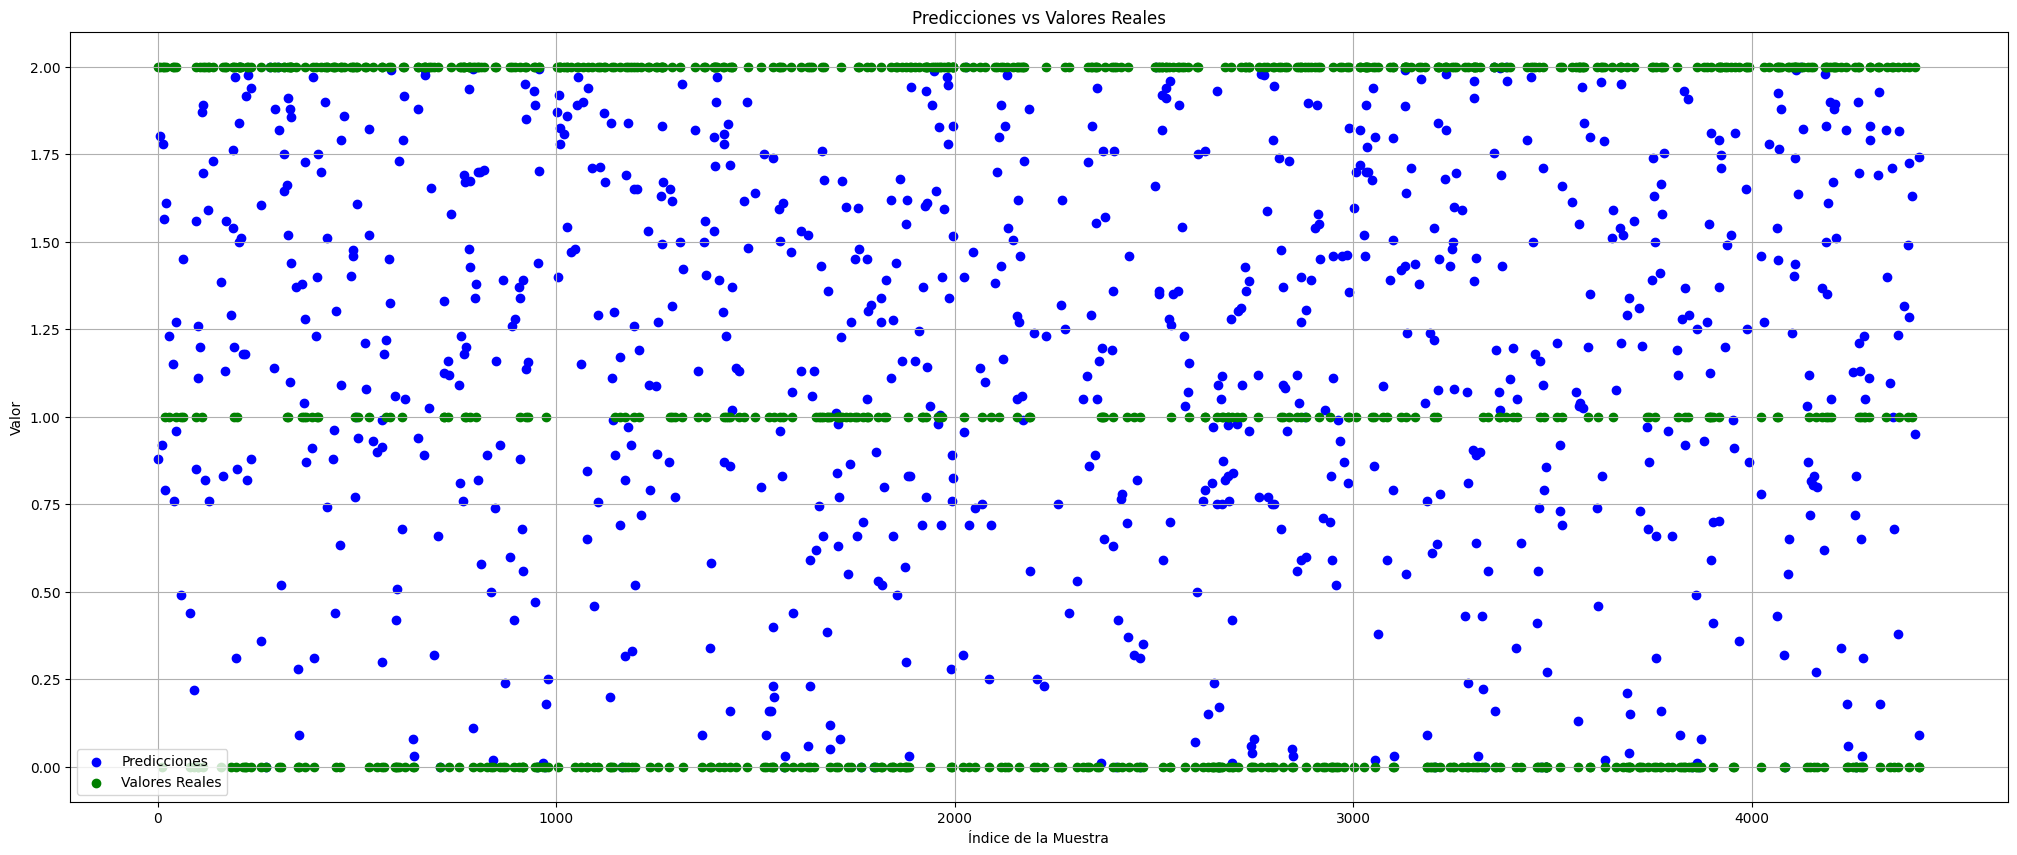

In [465]:
features = ['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification','Mothers occupation','Fathers occupation', 'Displaced','Tuition fees up to date','Scholarship holder','Age at enrollment']

attributes = new_data[features] # Quitamos la columna Target

objetive = new_data.Target # Definimos la columna Target como la variable objetivo

train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1) # Dividimos el dataset en entrenamiento y validación

# Crear un modelo de regresión con Random Forest
rf_model = RandomForestRegressor(random_state=1) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

rf_model.fit(train_X, train_y) # Entrenamos el modelo con los datos de entrenamiento

rf_val_predictions = rf_model.predict(val_X) # Realizamos predicciones con los datos de validación

rf_val_mae = mean_absolute_error(rf_val_predictions, val_y) # Calculamos el error medio absoluto

rf_val_varianza = explained_variance_score(rf_val_predictions, val_y) # Calculamos la varianza

# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": rf_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')


print("")
# Datos
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', rf_val_mae],
    ['Variance Value of original data', rf_val_varianza],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del Modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, rf_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


- ### **Modelo - Random Forest Regressor (Solo estos atributos)**
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Tuition fees up to date
- Scholarship holder
- Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (enrolled)
- Admission grade



Información del Modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.364644
Variance Value of original data     0.439806


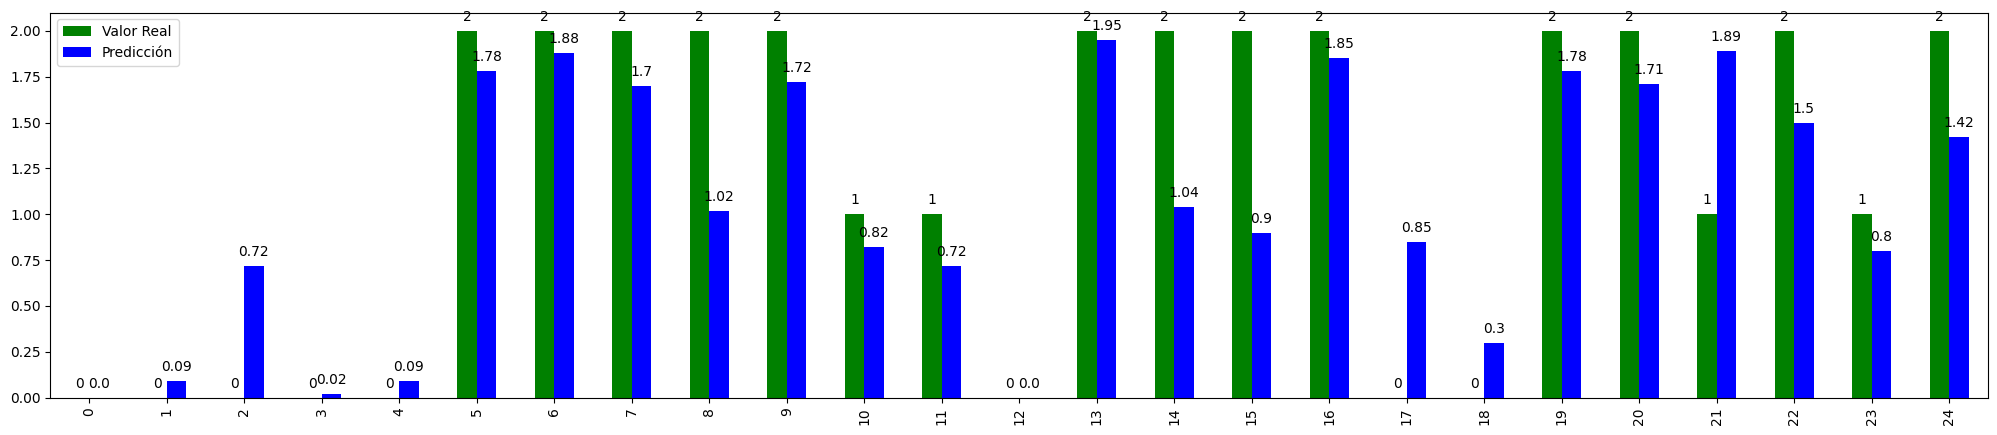

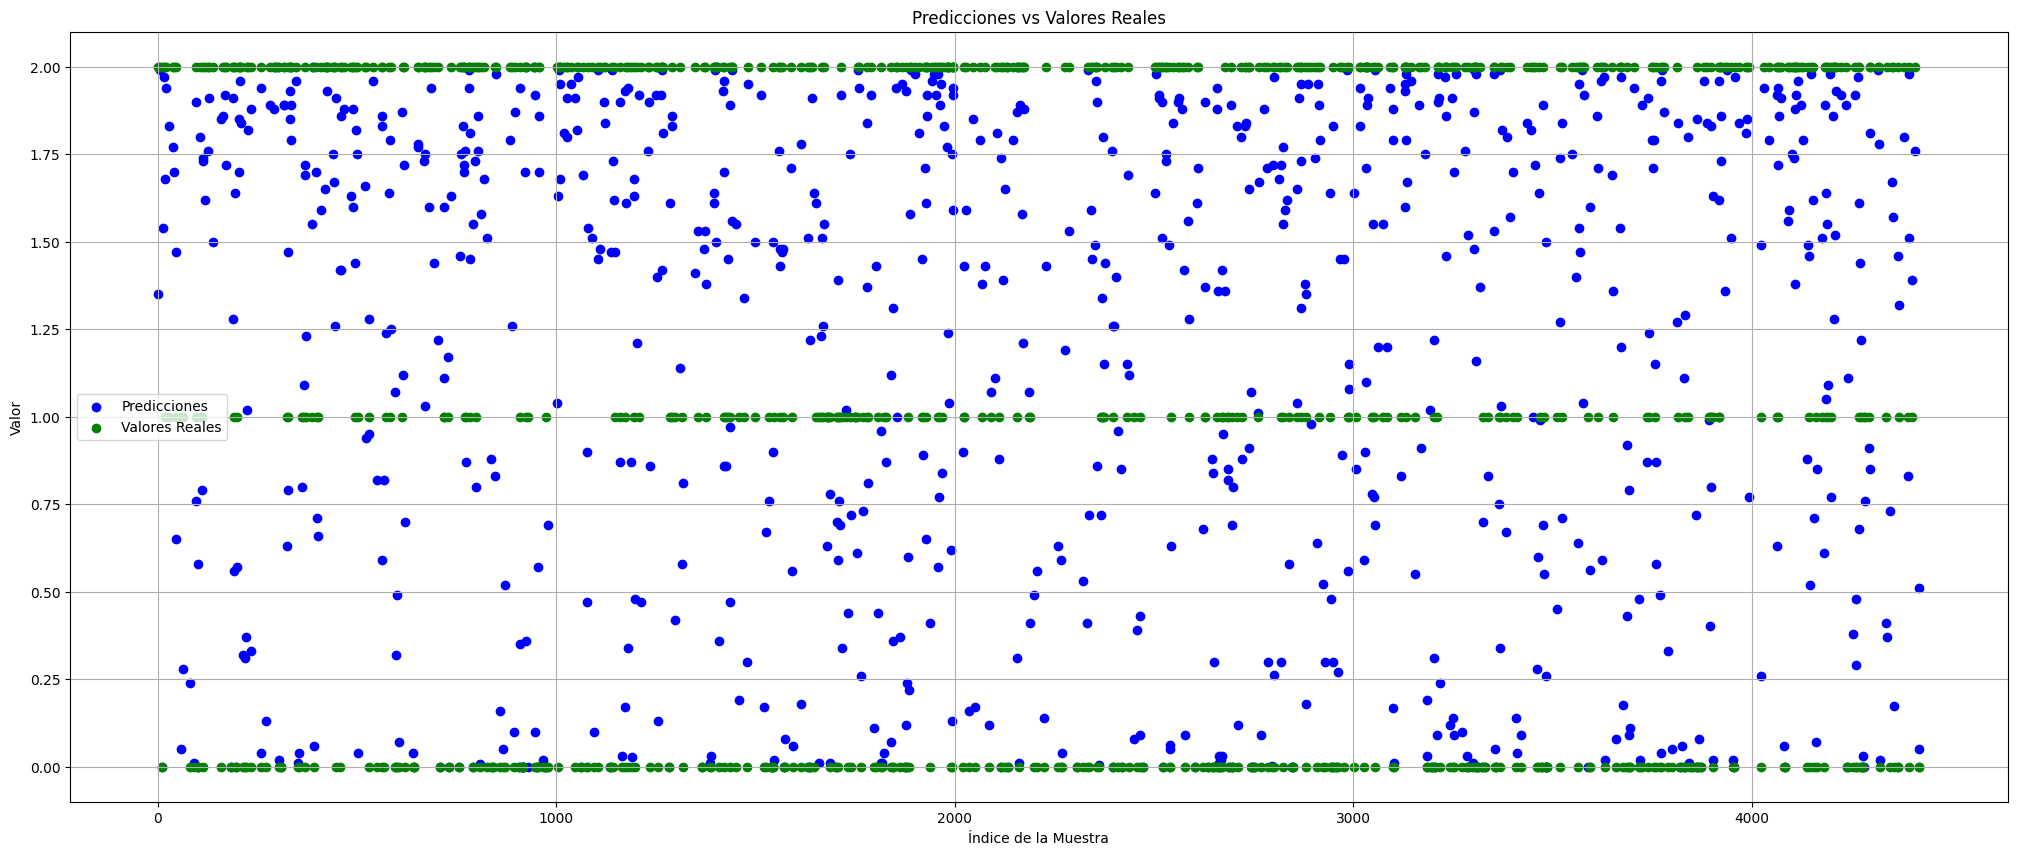

In [466]:
features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date','Scholarship holder','Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (enrolled)','Admission grade']

attributes = new_data[features] # Quitamos la columna Target

objetive = new_data.Target # Definimos la columna Target como la variable objetivo

train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1) # Dividimos el dataset en entrenamiento y validación

# Crear un modelo de regresión con Random Forest
rf_model = RandomForestRegressor(random_state=1) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

rf_model.fit(train_X, train_y) # Entrenamos el modelo con los datos de entrenamiento

rf_val_predictions = rf_model.predict(val_X) # Realizamos predicciones con los datos de validación

rf_val_mae = mean_absolute_error(rf_val_predictions, val_y) # Calculamos el error medio absoluto

rf_val_varianza = explained_variance_score(rf_val_predictions, val_y) # Calculamos la varianza

# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": rf_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')


print("")
# Datos
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', rf_val_mae],
    ['Variance Value of original data', rf_val_varianza],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del Modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, rf_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


- ### **Modelo - Random Forest Regressor (Solo estos atributos)**
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Tuition fees up to date
- Scholarship holder
- Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (enrolled)



Información del Modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.354149
Variance Value of original data     0.476983


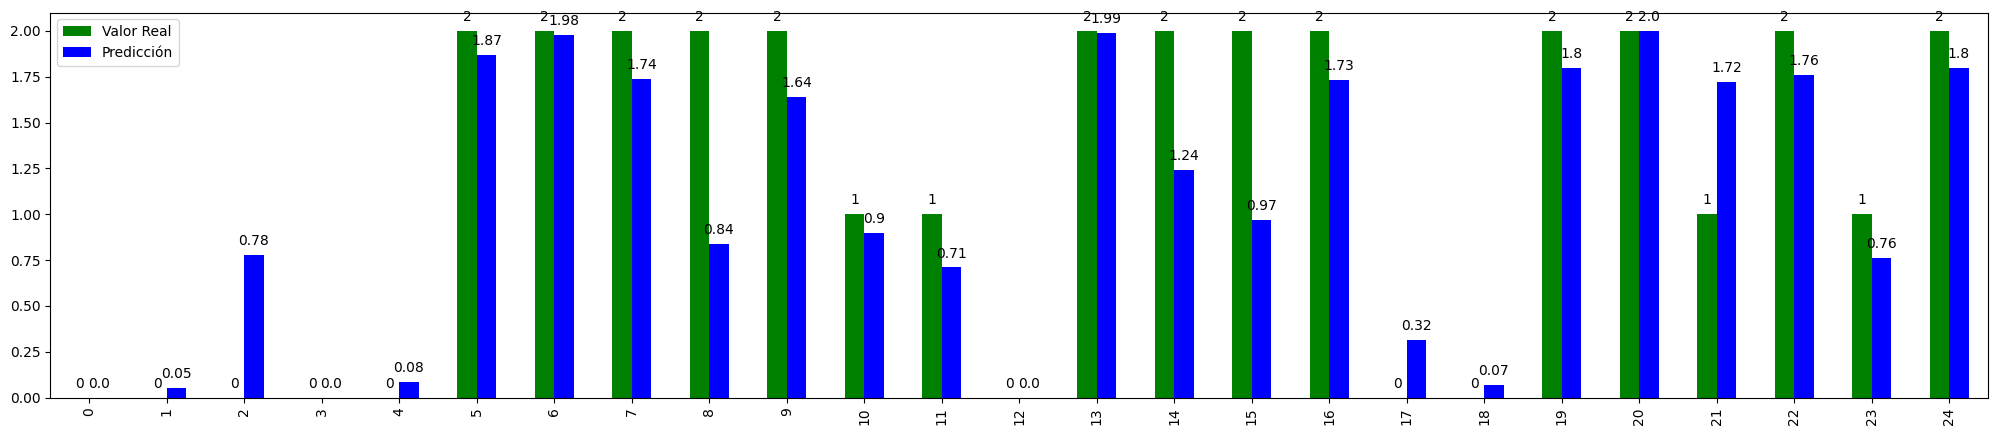

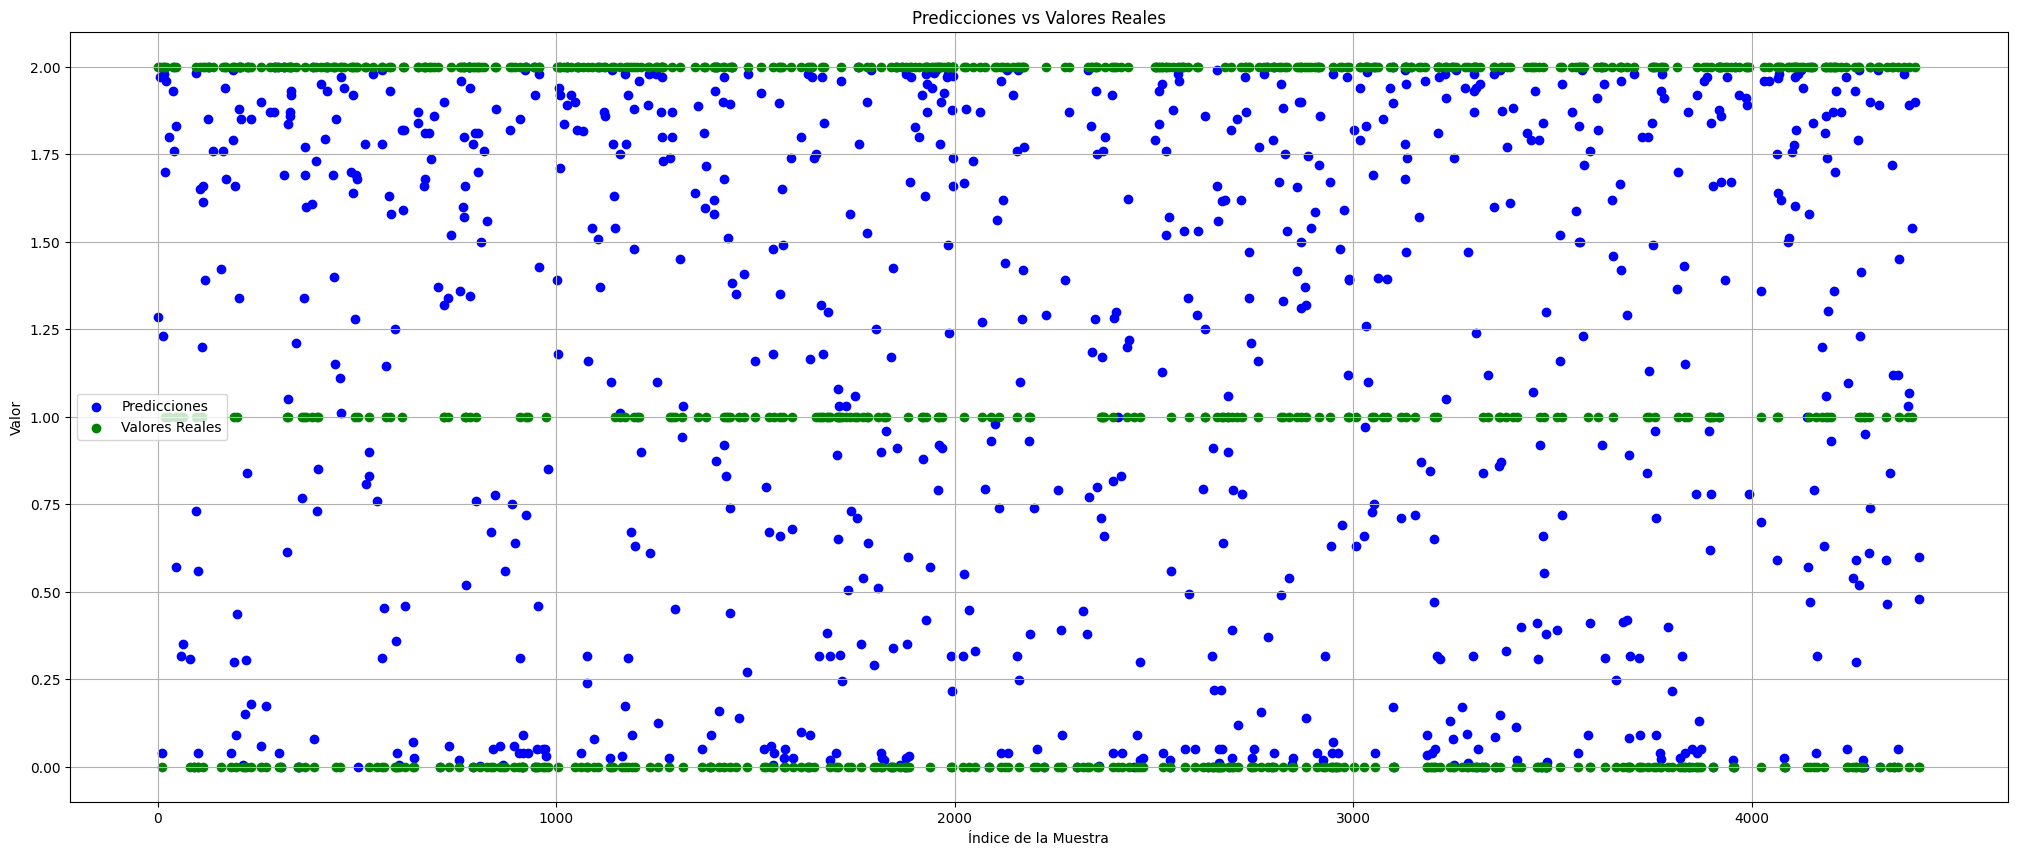

In [467]:
features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 
            'Curricular units 1st sem (grade)', 'Tuition fees up to date','Scholarship holder','Curricular units 2nd sem (enrolled)', 
            'Curricular units 1st sem (enrolled)']

attributes = new_data[features] # Quitamos la columna Target

objetive = new_data.Target # Definimos la columna Target como la variable objetivo

train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1) # Dividimos el dataset en entrenamiento y validación

# Crear un modelo de regresión con Random Forest
rf_model = RandomForestRegressor(random_state=1) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

rf_model.fit(train_X, train_y) # Entrenamos el modelo con los datos de entrenamiento

rf_val_predictions = rf_model.predict(val_X) # Realizamos predicciones con los datos de validación

rf_val_mae = mean_absolute_error(rf_val_predictions, val_y) # Calculamos el error medio absoluto

rf_val_varianza = explained_variance_score(rf_val_predictions, val_y) # Calculamos la varianza


# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": rf_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')


print("")
# Datos
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', rf_val_mae],
    ['Variance Value of original data', rf_val_varianza],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del Modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, rf_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


- ### **Modelo - Logistic Regression (Todos los atributos)**


Información del Modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.282759
Variance Value of original data     0.565934
Accuracy                            0.764368


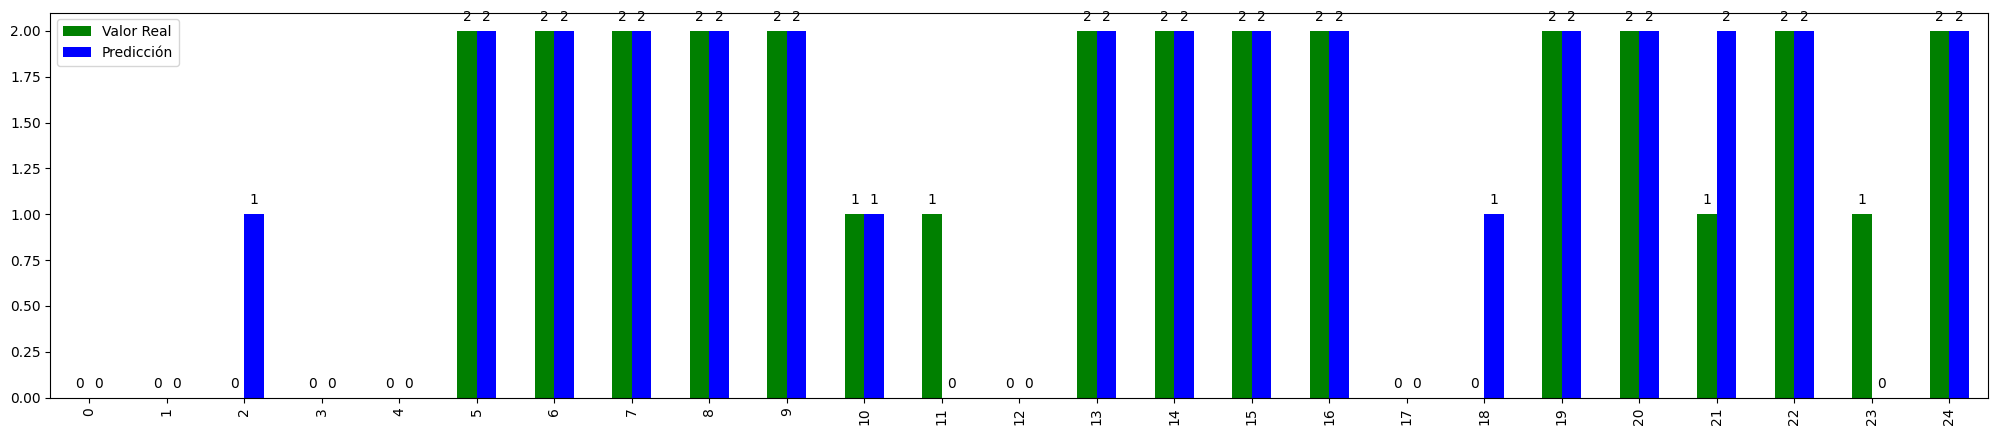

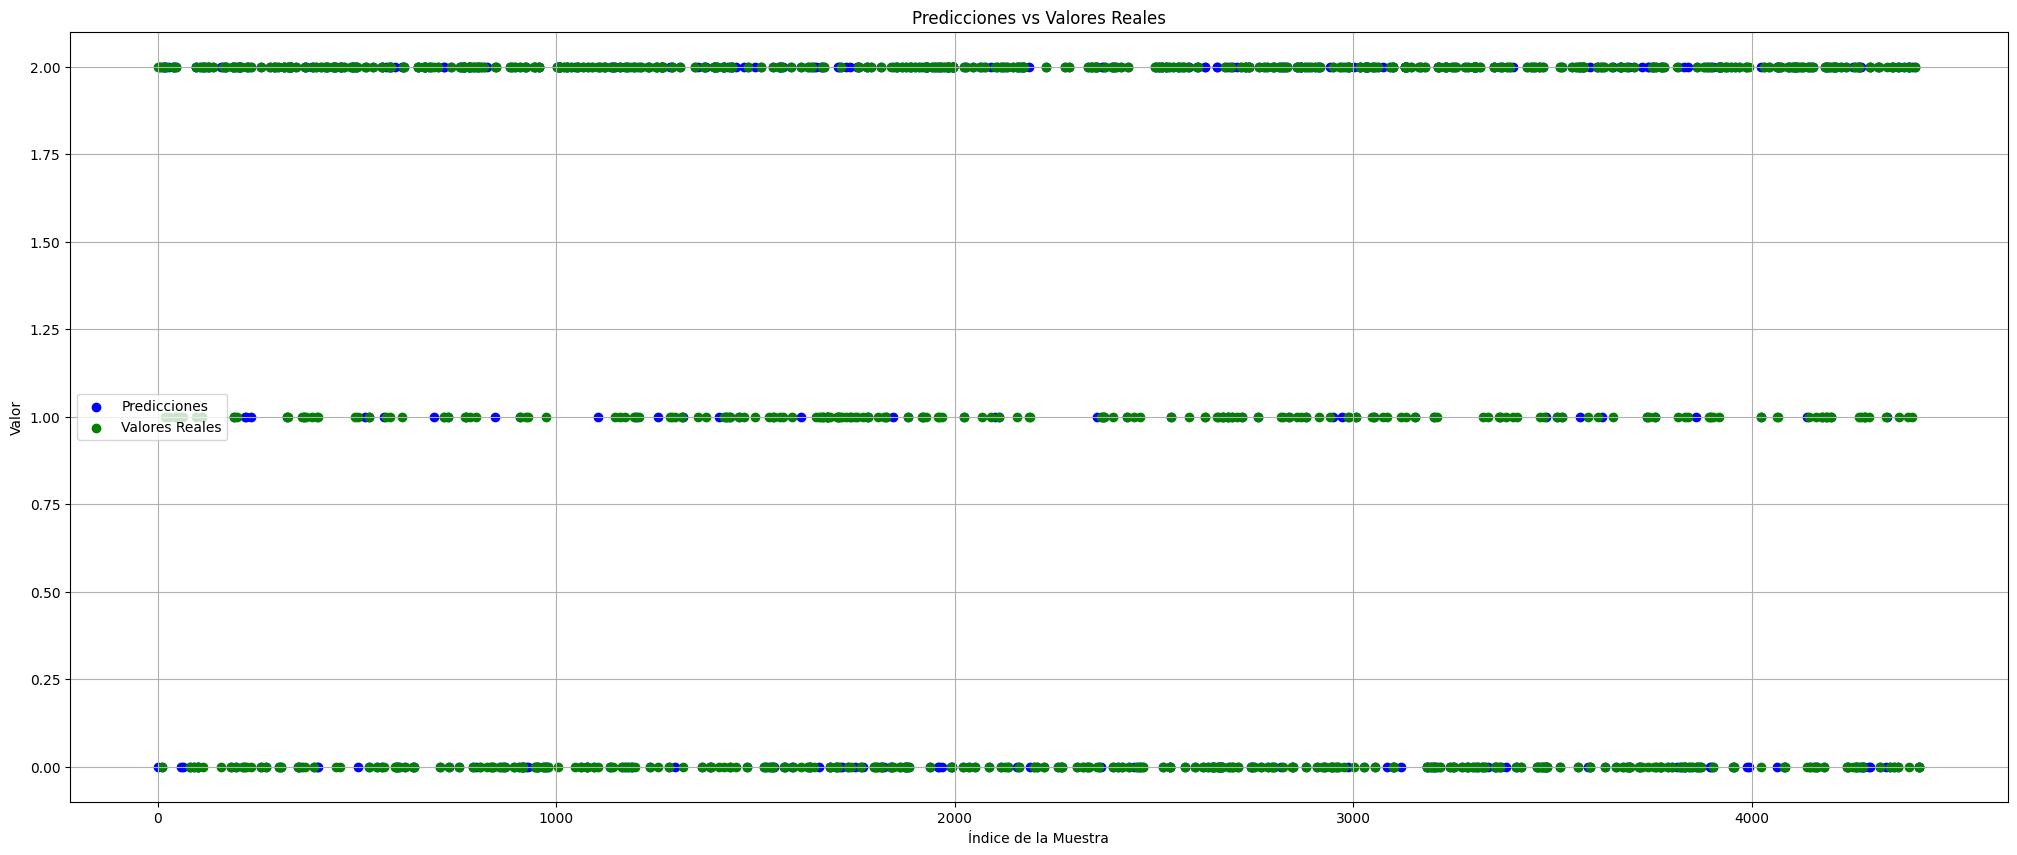

In [468]:
# Dividir el dataset en atributos y variable objetivo
attributes = new_data.drop('Target', axis=1) # Quitamos la columna Target
objetive = new_data.Target # Definimos la columna Target como la variable objetivo

# Dividir el dataset en entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1)

# Crear un modelo de regresión logística
logistic_model = LogisticRegression(random_state=1, solver='liblinear')

#logistic_model = LogisticRegression(random_state=1, max_iter=10000) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(train_X, train_y)

# Realizar predicciones con los datos de validación
logistic_val_predictions = logistic_model.predict(val_X)

# Calcular el error medio absoluto
logistic_val_mae = mean_absolute_error(logistic_val_predictions, val_y)

# Calcular la varianza
logistic_val_varianza = explained_variance_score(logistic_val_predictions, val_y)

logistic_accuracy = accuracy_score(val_y, logistic_val_predictions)
# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": logistic_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

print("")

# Información del modelo
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', logistic_val_mae],
    ['Variance Value of original data', logistic_val_varianza],
    ['Accuracy', logistic_accuracy],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del Modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, logistic_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



- ### **Modelo - Logistic Regression (Solo estos atributos)**
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Tuition fees up to date
- Scholarship holder
- Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (enrolled)


Información del Modelo               Valores
-------------------------------  -----------
N° total de estudiantes          4347
N° registros para Entrenamiento  3477
N° registros para Validación      870
Resultado MAE                       0.291954
Variance Value of original data     0.580065
Accuracy                            0.755172


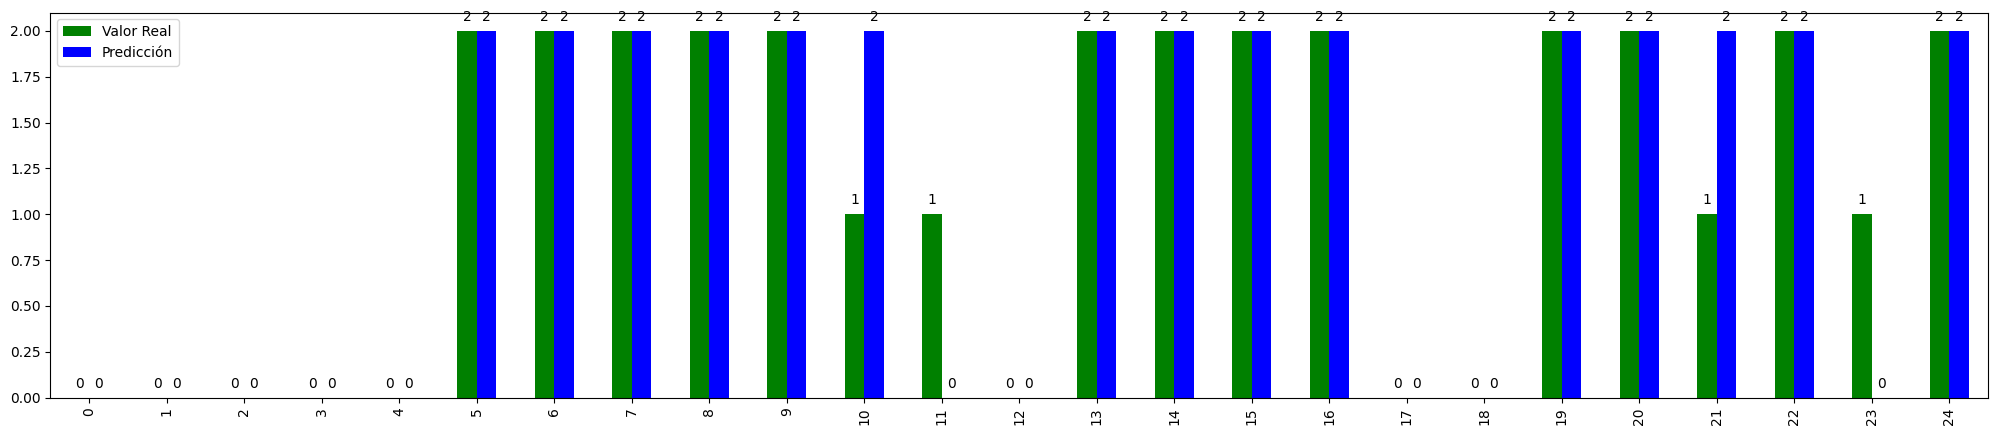

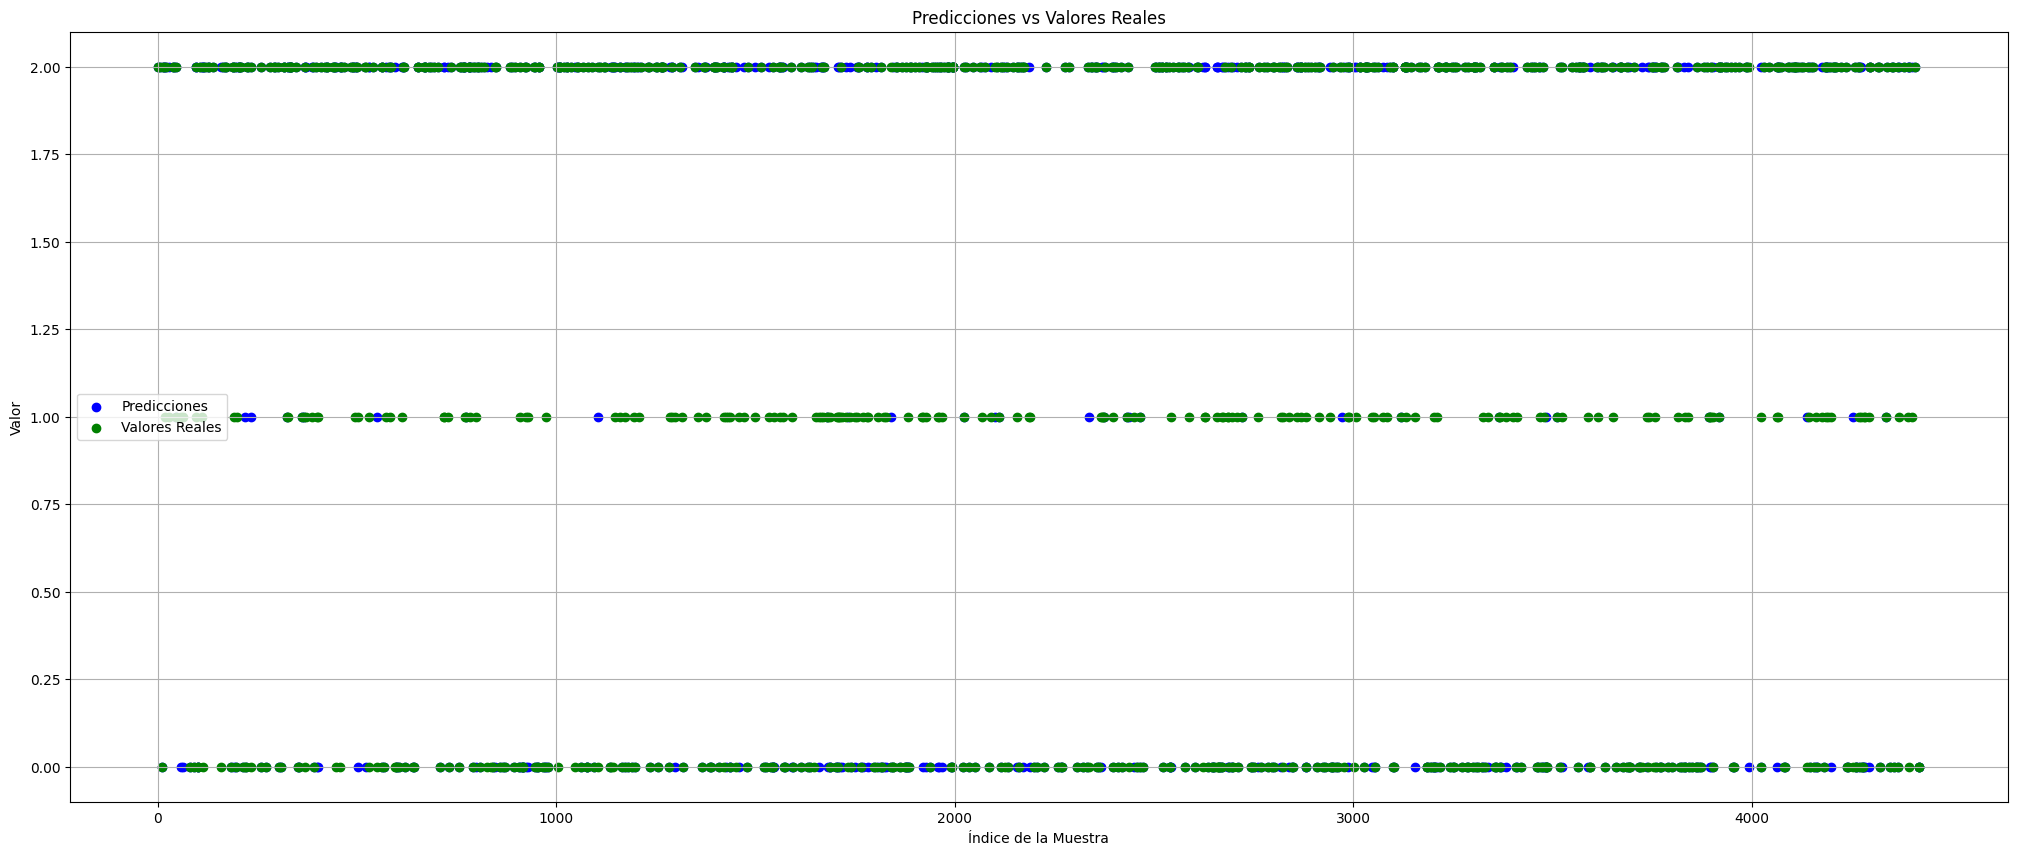

In [469]:
features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 
            'Curricular units 1st sem (grade)', 'Tuition fees up to date','Scholarship holder','Curricular units 2nd sem (enrolled)', 
            'Curricular units 1st sem (enrolled)']

attributes = new_data[features] # Quitamos la columna Target

objetive = new_data.Target # Definimos la columna Target como la variable objetivo

# Dividir el dataset en entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(attributes, objetive, test_size=0.2, random_state=1)

# Crear un modelo de regresión logística
logistic_model = LogisticRegression(random_state=1, solver='liblinear')

#logistic_model = LogisticRegression(random_state=1, max_iter=10000) # Definimos el modelo con una semilla aleatoria para reproducibilidad de resultados

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(train_X, train_y)

# Realizar predicciones con los datos de validación
logistic_val_predictions = logistic_model.predict(val_X)

# Calcular el error medio absoluto
logistic_val_mae = mean_absolute_error(logistic_val_predictions, val_y)

# Calcular la varianza
logistic_val_varianza = explained_variance_score(logistic_val_predictions, val_y)

logistic_accuracy = accuracy_score(val_y, logistic_val_predictions)

# Datos
data = {
    "Valor Real": np.array(val_y[0:25]),
    "Predicción": logistic_val_predictions[0:25]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras con el tamaño deseado
ax = df.plot(kind='bar', color=['green', 'blue'], figsize=(25, 5))

# Anotar los valores encima de las barras
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

print("")

# Información del modelo
data = [
    ['N° total de estudiantes', new_data['Target'].count()],
    ['N° registros para Entrenamiento', train_y.count()],  # Conteo de estudiantes para entrenamiento (80%)
    ['N° registros para Validación', val_y.count()],  # Conteo de estudiantes para validación (20%)
    ['Resultado MAE', logistic_val_mae],
    ['Variance Value of original data', logistic_val_varianza],
    ['Accuracy', logistic_accuracy],
]

# Impresión de la tabla
print(tabulate(data, headers=["Información del Modelo", "Valores"]))

# Crear una figura y ejes
plt.figure(figsize=(25, 10))

# Graficar los valores predichos en azul
plt.scatter(val_y.index, logistic_val_predictions, color='blue', label='Predicciones')

# Graficar los valores reales en verde
plt.scatter(val_y.index, val_y, color='green', label='Valores Reales')

# Etiquetas y título
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

## **Fase: Evaluación:**

Algunos puntos importantes ha destacar son los siguientes: 

- La modalidad de aplicación sí importa y el tipo 39 (Mayores de 23 años) tiene la mayor deserción estudiantil que cualquier otro tipo.
- Los becarios tienden a tener menor abandono que los no becados.
- El género no importa en el caso de deserción. Sin embargo, si se nota una diferencia en el caso de los graduados, que tiende a ser favorable para el género femenino.